# **Mana Saleh Al Aqeel**

## Assignment 1: 

Submit a write-up on the following:

- Hugging face agents

- Hugging face pipeline for text generation

- HF inference endpoints

- Give feedback on the image generation and explore different models available on the Hugging Face website

### Hugging face agents

Intermediaries that manage tasks like selecting, loading, and running models.
- Key Feature: Automates the selection of the best model for specific tasks.
- Example Use Case: Building a chatbot that generates and understands human-like text without manual model integration.

<img src = 'https://miro.medium.com/v2/resize:fit:1400/1*-n9IKAel_phGCkAgVjZfjQ.png'>

### Text Generation with Hugging Face Pipelines

Easy-to-use pre-trained models for various tasks.
- Key Feature: Generates coherent and contextually relevant text from input prompts.
- Example Use Case: Creating story continuations or conversational responses by providing a starting sentence or phrase.

`Pipeline` can easily perform sentiment analysis and other tasks without needing to manually handle tokenization, model inference, and post processing steps.
<img src = 'https://miro.medium.com/v2/resize:fit:2000/1*-8CrN2uQpUOphkQCEkbbHw.jpeg'>

### Hugging Face Inference Endpoints

Scalable, real-time APIs for deploying machine learning models.

- Key Feature: Simplifies integration of models into applications without managing infrastructure.
- Example Use Case: Deploying a sentiment analysis model as an endpoint for real-time sentiment scoring.

<img src= 'https://raw.githubusercontent.com/huggingface/hf-endpoints-documentation/main/assets/creation_flow.png'>

### Exploring Image Generation with Hugging Face Models

Access to various image generation models.

- Key Feature: Generates high-quality images from text descriptions.
- Example Use Case: Creating images from descriptions such as 'a cat sitting on a beach.'

<img src = 'https://miro.medium.com/v2/resize:fit:1082/1*tv5bTLThxuDX_HDMrrwVjg.png'>

---

## Assignment 2:

Using OpenAI's CLIP Model for Image Captioning and Building an Image Search Engine

**In this assignment, you will use OpenAI's CLIP (Contrastive Language-Image Pre-training) model to:**
- Generate captions for 15 different images.
- Build a search engine for these images using a larger dataset of images.

### Read Images

In [2]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torch
from sentence_transformers.util import cos_sim
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

In [3]:
image_dir = 'images'
image_paths = [os.path.join(image_dir, file) for file in os.listdir(image_dir) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

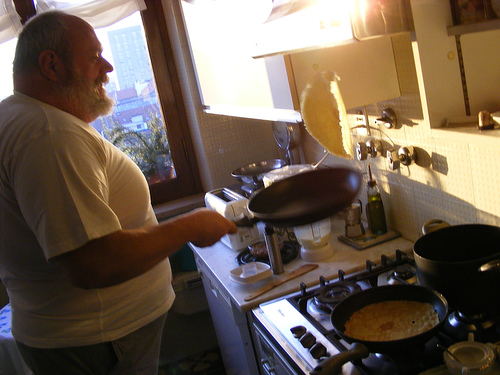

In [4]:
Image.open(image_paths[0])

### Generate captions for 15 different images

In [5]:
from transformers import pipeline
device = 'cuda' if torch.cuda.is_available() else 'cpu'
pipe = pipeline("image-to-text", model="Salesforce/blip-image-captioning-base", device=0 if device == 'cuda' else -1)
print(f"Model is using device: {device}")

Model is using device: cuda


In [6]:
captions = [pipe(image)[0]['generated_text'] for image in image_paths[:15]]

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


1 : a man in a kitchen


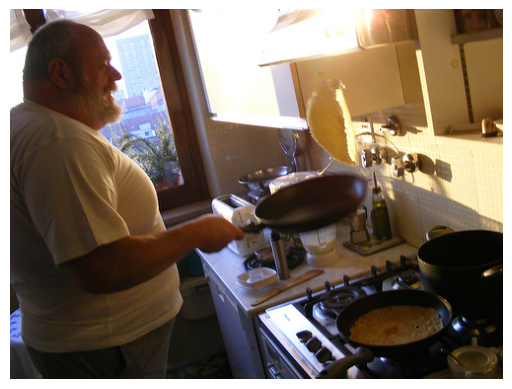

2 : a boy on a bus


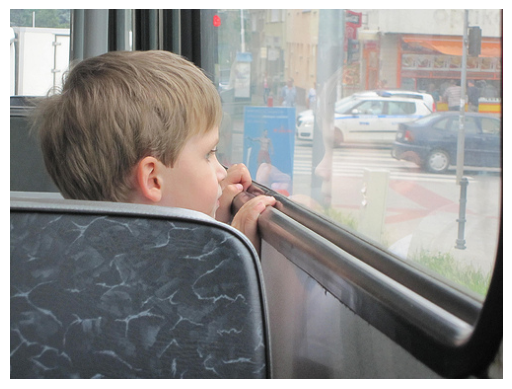

3 : a dog running in the water


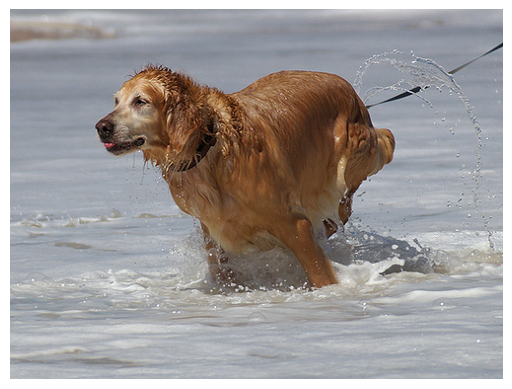

4 : a woman and a dog climbing a tree


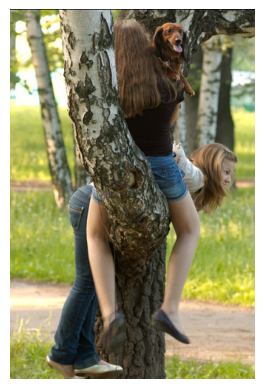

5 : a dog jumping in the air


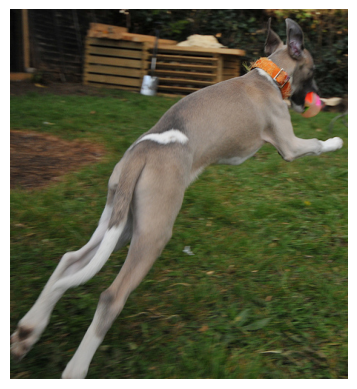

6 : a man swimming in a pool


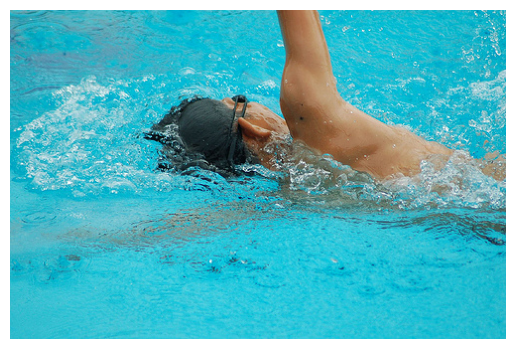

7 : a crowd of people


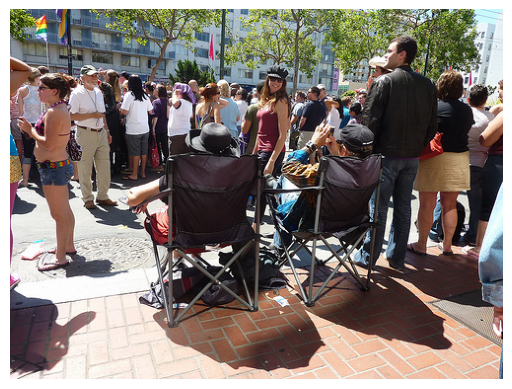

8 : a group of people


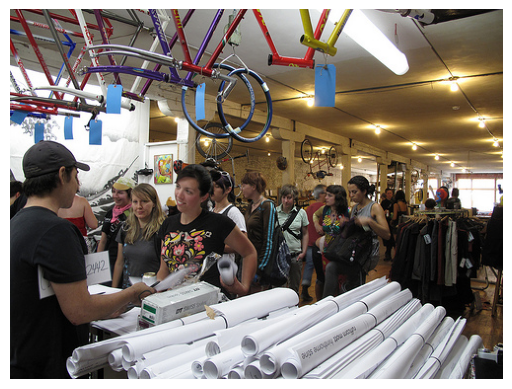

9 : a woman writing on a blackboard


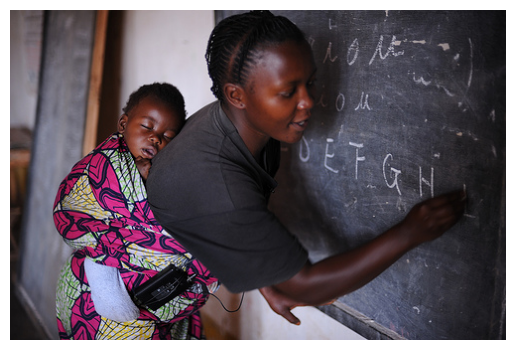

10 : a man and woman


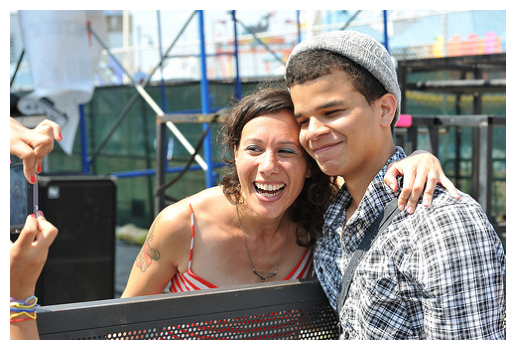

11 : a man standing in the water


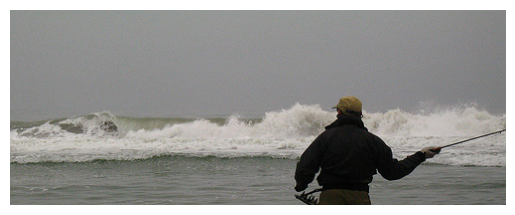

12 : a dog playing with a frc


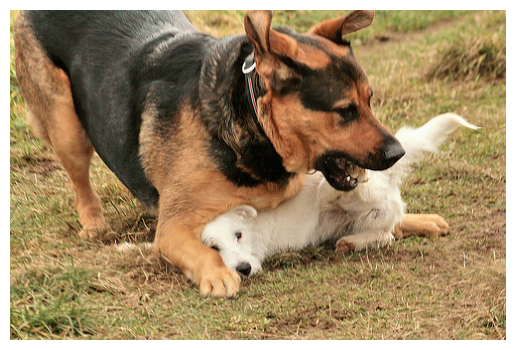

13 : a man sitting at a table


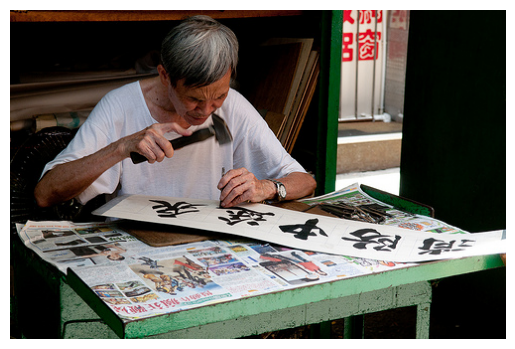

14 : a man climbing a rock


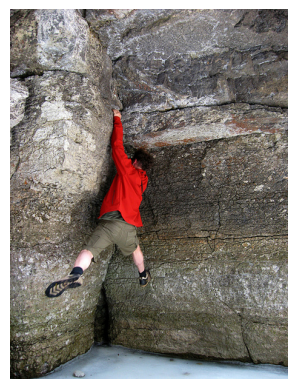

15 : a brick building


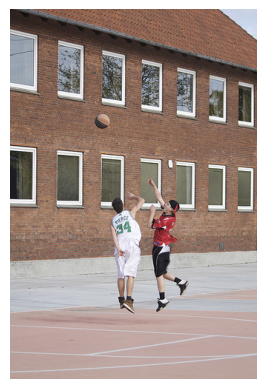

In [7]:
for i, (images, caption) in enumerate(zip(image_paths[:15], captions)):
    print(f"{i+1} : {caption}")
    image = Image.open(images)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [8]:
torch.cuda.empty_cache()

### Build a search engine for these images using a larger dataset of images.

In [9]:
from transformers import CLIPProcessor, CLIPModel
md = 'openai/clip-vit-base-patch32'

model = CLIPModel.from_pretrained(md).cuda()
processor = CLIPProcessor.from_pretrained(md)

In [10]:
caption = ["Footbal"]

In [11]:
image_tensors = [torch.tensor(np.array(Image.open(path))) for path in image_paths[:1000]]

inputs = processor(
        text=caption,
        images=image_tensors,
        return_tensors='pt', padding=True
    )
inputs = {k: v.cuda() for k, v in inputs.items()}

with torch.no_grad():
    outputs = model(**inputs)
    image_features = outputs.image_embeds
    text_features = outputs.text_embeds

In [12]:
similarity_scores = cos_sim(image_features, text_features)
print(similarity_scores.shape)

torch.Size([1000, 1])


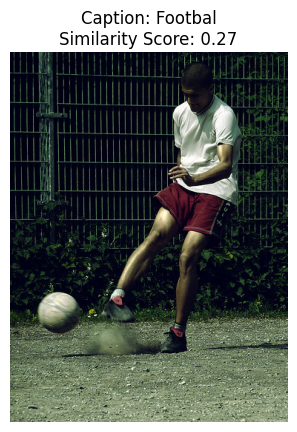

In [13]:
for i, caption in enumerate(caption):
    max_score = -float('inf')
    best_image_index = -1

    for j in range(len(image_tensors)):
        score = similarity_scores[j, i].item()
        if score > max_score:
            max_score = score
            best_image_index = j

    plt.imshow(image_tensors[best_image_index])  # Ensure `images` is in the correct format
    plt.title(f"Caption: {caption}\nSimilarity Score: {max_score:.2f}")
    plt.axis('off') 

In [1]:
torch.cuda.empty_cache()

---

# Part 2: Build an Image Search Engine


## Submission
Submit the following as a **Streamlit** app:

- Your Python code for generating captions and building the search engine.
- A report describing your approach, challenges faced, and how you overcame them.
- Screenshots of the interface and results.

Evaluation Criteria

- Correctness and efficiency of the code.
- Clarity and completeness of the report.
- Usability and functionality of the search engine interface.

#Please don't use any Generative AI Models